In [188]:
"""                                                                                                                                                                             
Testing Growing Neural Gas implementation by mdp package (Modular Toolkit for Data Processing)
"""
import mdp


def uniform(min_, max_, dims):
    """Return a random number between min_ and max_ ."""
    return mdp.numx_rand.random(dims)*(max_-min_)+min_

def circumference_distr(center, radius, n):
    """Return n random points uniformly distributed on a circumference."""
    phi = uniform(0, 2*mdp.numx.pi, (n, 1))
    x = radius*mdp.numx.cos(phi)+center[0]
    y = radius*mdp.numx.sin(phi)+center[1]
    return mdp.numx.concatenate((x, y), axis=1)

def circle_distr(center, radius, n):
    """Return n random points uniformly distributed on a circle."""
    n = int(n)
    phi = uniform(0, 2*mdp.numx.pi, (n, 1))
    sqrt_r = mdp.numx.sqrt(uniform(0, radius*radius, (n, 1)))
    x = sqrt_r*mdp.numx.cos(phi)+center[0]
    y = sqrt_r*mdp.numx.sin(phi)+center[1]
    return mdp.numx.concatenate((x, y), axis=1)

def rectangle_distr(center, w, h, n):
    """Return n random points uniformly distributed on a rectangle."""
    n = int(n)
    x = uniform(-w/2., w/2., (n, 1))+center[0]
    y = uniform(-h/2., h/2., (n, 1))+center[1]
    return mdp.numx.concatenate((x, y), axis=1)

def gen_data(n=2000):
    """ Generate data as a mix of 5 different geometrical figures """
    # Circumferences
    cf1 = circumference_distr([6, -0.5], 2, n)
    cf2 = circumference_distr([3, -2], 0.3, n)

    # Circles:
    cl1 = circle_distr([-5, 3], 0.5, n/2)
    cl2 = circle_distr([3.5, 2.5], 0.7, n)

    # Rectangles:
    rect1 = rectangle_distr([-1.5, 0], 1, 4, n)
    rect2 = rectangle_distr([+1.5, 0], 1, 4, n)
    rect3 = rectangle_distr([0, +1.5], 2, 1, n/2)
    rect4 = rectangle_distr([0, -1.5], 2, 1, n/2)

    # Shuffle the points to make the statistics stationary
    x = mdp.numx.concatenate([cf1, cf2, cl1, cl2, rect1, rect2, rect3, rect4], axis=0)
    x = mdp.numx.take(x, mdp.numx_rand.permutation(x.shape[0]), axis=0)

    return x


In [189]:
mdp.numx_rand.seed(1266090063)

In [190]:
data = gen_data()

In [203]:
import matplotlib.pyplot as plt
import numpy as np

In [192]:
data = 

array([[ 3.72241405,  2.73878526],
       [-5.36647777,  3.11595457],
       [ 4.01807567, -0.23171665],
       ...,
       [-1.51124741,  1.00785823],
       [ 3.80703666,  2.9797321 ],
       [-0.02171322,  1.7148852 ]])

In [193]:
len(data)

13000

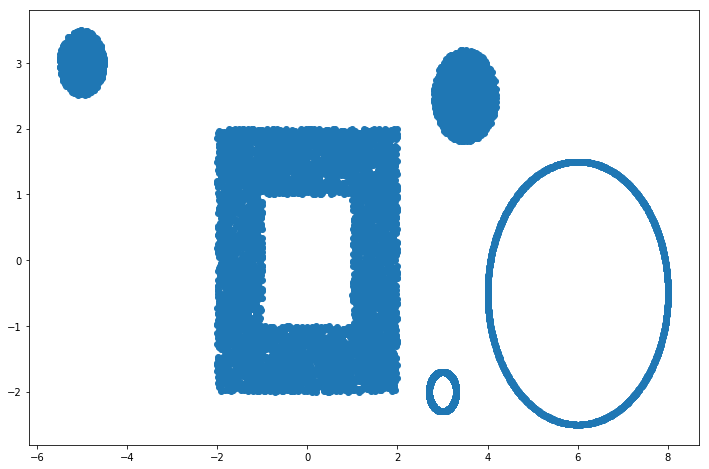

In [194]:
plt.figure(figsize=(12, 8))
plt.scatter(data[:,0], data[:,1])

In [207]:
gng = mdp.nodes.GrowingNeuralGasNode(max_nodes=13000)

In [208]:
gng.get_current_train_phase()

0

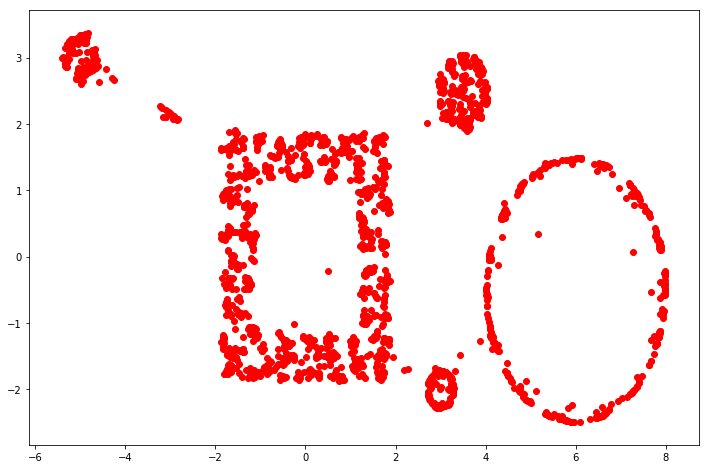

In [209]:
STEP = 500

plt.figure(figsize=(12,8))
x = []
y = []
for i in range(0, data.shape[0], STEP):
    gng.train(data[i:i+STEP])
    nodes = gng.get_nodes_position()
    #print(len(nodes), nodes)
    x = nodes[:,0]
    y = nodes[:,1]
    #print(x, y)
    #print(gng.graph.connected_components())
    #print(len(x), len(y), x.size, y.size)
    plt.scatter(x, y, c='r')
    #print(gng.get_output_dim())
    # [...] plotting instructions
    


In [210]:
len(gng.get_nodes_position())

131

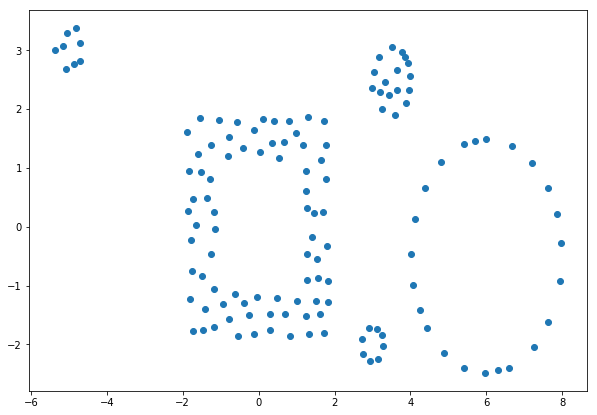

In [211]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)

In [212]:
gng.stop_training()

In [213]:
n_obj = len(gng.graph.connected_components())

In [214]:
n_obj

5

In [215]:
components = gng.graph.connected_components()

In [216]:
colors = []

In [217]:
for i, graph in enumerate(gng.nearest_neighbor(data)[0]):
    for j, graphs in enumerate(components):
        for elem in graphs:
            if graph == elem:
                colors = np.append(colors, j+1)
                #print('idx', i, 'elem', data[i], 'component', j+1)

In [218]:
colors

array([4., 1., 5., ..., 3., 4., 3.])

In [219]:
wcolors = np.where(colors==1,'r',
                   np.where(colors==2,'g',
                            np.where(colors==3, 'b',
                                    np.where(colors==4, 'c',
                                            np.where(colors==5, 'm', 'k')))))

In [220]:
wcolors

array(['c', 'r', 'm', ..., 'b', 'c', 'b'], dtype='<U1')

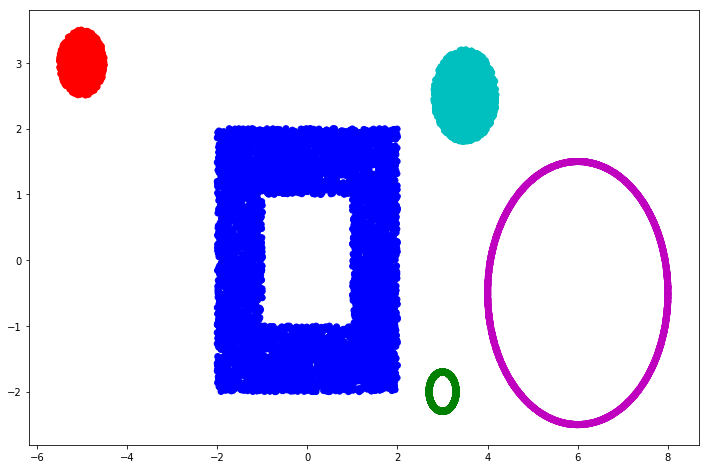

In [221]:
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], c=wcolors)

In [180]:
for i, graph in enumerate(gng.graph.nodes):
    for j, graphs in enumerate(components):
        for elem in graphs:
            if graph == elem:
                print('idx', i, 'elem', graph.data.pos, 'component', j+1, graph.data.label, graph.data.hits)

idx 0 elem [ 7.23254388 -2.05746195] component 1 None 0
idx 1 elem [-5.36403613  3.10224658] component 2 None 0
idx 2 elem [3.17291098 2.25801587] component 3 None 0
idx 3 elem [-1.2256433   0.31519241] component 4 None 0
idx 4 elem [ 2.73457925 -1.90414328] component 5 None 0
idx 5 elem [0.28295617 1.69266225] component 4 None 0
idx 6 elem [-1.85676738 -1.16814534] component 4 None 0
idx 7 elem [ 5.40657185 -2.40082517] component 1 None 0
idx 8 elem [-0.74929041  1.24010923] component 4 None 0
idx 9 elem [7.80357965 0.3454038 ] component 1 None 0
idx 10 elem [ 1.4475024 -0.9739248] component 4 None 0
idx 11 elem [1.28392604 0.28316961] component 4 None 0
idx 12 elem [ 4.28184017 -1.50459491] component 1 None 0
idx 13 elem [1.73387008 1.79385598] component 4 None 0
idx 14 elem [5.41178705 1.39970947] component 1 None 0
idx 15 elem [-1.78444511  1.78496129] component 4 None 0
idx 16 elem [ 0.78977649 -1.83671335] component 4 None 0
idx 17 elem [4.0245481  2.14967485] component 3 None 0


In [181]:
colors = np.zeros(len(data))

In [182]:
for graph in gng.graph.nodes:
    for j, graphs in enumerate(components):
        for elem in graphs:
            if graph == elem:
                colors = np.append(colors, j+1)
                continue

In [183]:
colors

array([0., 0., 0., ..., 4., 4., 3.])

In [184]:
wcolors = np.where(colors==1,'r',
                   np.where(colors==2,'g',
                            np.where(colors==3, 'b',
                                    np.where(colors==4, 'c',
                                            np.where(colors==5, 'm', 'k')))))

In [185]:
wcolors

array(['k', 'k', 'k', ..., 'c', 'c', 'b'], dtype='<U1')

In [186]:
conX = np.concatenate((data[:,0],gng.get_nodes_position()[:,0]))
conY = np.concatenate((data[:,1],gng.get_nodes_position()[:,1]))

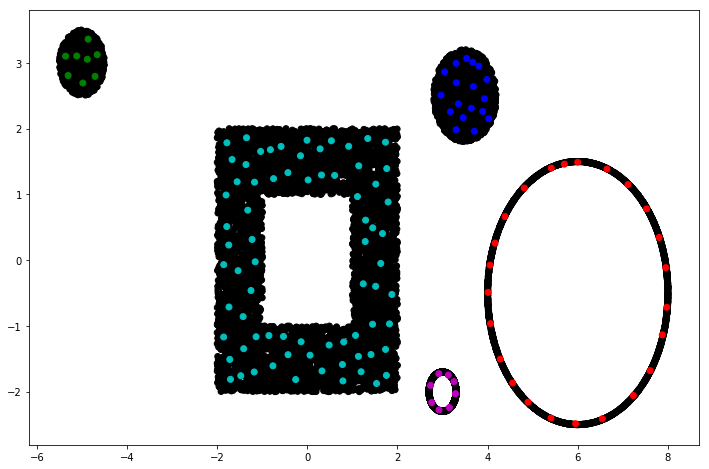

In [187]:
plt.figure(figsize=(12,8))
plt.scatter(conX, conY, c=wcolors)